Updated 2022-05-17 (Tue)
- 전체 data: data
- 카테고리 정리한 것: df
- 실결제자 DataFrame: actual_cs

# EDA (Exploratory Data Analysis)


DATA -fastcampus(210329_210926)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets

%matplotlib inline 
#%matplotlib notebook 

In [3]:
from pandas import DataFrame
from pandas import Series

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [6]:
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumBarun' in f.name]

[('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf')]

## 데이터 살펴보기

In [7]:
data = pd.read_csv(
    '/content/drive/MyDrive/이어드림스쿨2기/20220509 Mini Project_데이터 분석/파이널프로젝트_RAW_210329_210926.csv')

In [8]:
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00


### 컬럼 설명

- **id**:  해당 거래내역에 대한 ID (PK)
- **customer_id**:  결제한 고객 ID
- **course_id**:  강의 ID, 프로모션에 대해서는 값이 할당되어 있지 않습니다.
- **type**:  거래의 종류
- **state**:  거래에 대한 상태
- **course_title**:  강의 제목
- **category_title**:  대분류
- **format**:  온라인 강의의 기획 종류
- **completed_at**:  state가 COMPLETED로 변경된 시점 (현재 state에는 REQUESTED와 COMPLETED 뿐이기 때문에, REQUESTED였던 거래내역이 COMPLETED로 바뀔 때, 즉 실제 구매가 발생했을 때의 시각)
- **transaction_amount**:  최종 결제 금액    (네이버페이 등의 PG사에서 포인트 차감 등으로 sale_price와 차이가 발생할 수 있음)
- **coupon_title**:  쿠폰 종류
- **coupon_discount_amount**:  쿠폰 할인 금액
- **sale_price**:  판매 금액 
- **tax_free_amount**:  보안상 공유가 힘듬
- **pg**:  PG사 종류 (PG가 null로 되어있는 부분은 default로 세팅된 다른 PG사라고 생각해주시면 됩니다.)
- **method**:  결제 방식  (method에 TRANS와 TRANSACTION 같은 데이터이고 무시해도 좋음)
- **subcategory_title**:  중분류
- **marketing_start_at**:  강의 판매 시점, 웹 페이지 상에 landing page로 올라온 것을 기준 (자세한 사항은 공유가 힘듬) (비어있는 값은 무시해도 좋음)

>**type 	유형**<br>
　**- ORDER**	<s>DEPRECATE</s> (ORDER 상태는 2021년 7월까지만 사용하던 상태로, 내부적으로 정의되어 사용되던 것이라 현재는 무시해도 좋음)
<br>　<s>- TRANSACTION</s>	B2B계약결제 (B2B CONTRACT로 생성된 데이터로 무시해도 좋음)
<br>　**- PAYMENT**　결제
<br>　**- REFUND**　환불

>**state	상태**
<br>　**- COMPLETED**　결제 완료
<br>　**- REQUESTED**　고객에게 결제 요청
<br>　- PENDING　보안 이슈로 공개X
<br>　- CANCELLED　보안 이슈로 공개X
<br>　- HIDDEN　보안 이슈로 공개X
<br>　- DELETE　보안 이슈로 공개X

> **format**
<br>　- **B2B**	B2B 온라인 외 기업강의 (기업교육 계약 시 생성)
<br>　- **B2B 온라인**	B2B 온라인 구독제 : 패키지 플랜, 올 플랜 등 패스트캠퍼스 온라인 강의를 구독하는 형식의 상품 (기업교육 계약시 생성)
<br>　- **B2G**	K-Digital Training, K-Digital Credit 등 정부 사업 (커리어 교육 사업 - 무료 과정)
<br>　- **MBA**	MBA (경영학 석사)
<br>　- **RED**	연사 강조 강의
<br>　- **관리**	관리용
<br>　- **스쿨**	커리어 교육 사업 : 오프라인 강의 (Snowball CIC)
<br>　- **스쿨 온라인**	커리어 교육 사업 : 온라인 강의 (Snowball CIC)
<br>　- **아카이브**	아카이브
<br>　- **온라인**	-
<br>　- **온라인 완주반**	온라인 완주 즉, '완강' 시 환급해주는 상품
<br>　- **올인원**	올인원 패키지, 초격차 패키지 등 온라인 강의
<br>　- **이벤트**	이벤트
<br>　- **캠프**	캠프 (오프라인 강의 : 주 2~3회 저녁 or 주말 시간 대 강의 진행)
<br>　- **콜로소**	취미 교육 사업 : 온라인 강의 (콜로소 CIC)
<br>　- **하루10분컷**	Snowball

> Q9. coupon_discount_amount가 sale_price보다 크고 transaction_amount가 0보다 큰 데이터가 4개 존재합니다. 쿠폰 금액이 강의 가격보다 더 비싼데 결제를 한 이 데이터들은 어떻게 해석해야할지 여쭤보고 싶습니다.<br>
A9. 이 데이터는 무시하셔도 좋습니다. (보안상 이슈로 자세한 답변이 어려움)

>A15. 제공되는 데이터는 해당 기간에 발생한 모든 데이터중에 개인정보 이슈가 있는 데이터들만 제외한 데이터입니다. type이 바뀌게 되면 새롭게 row가 추가됩니다.


In [9]:
data.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
count,1.054190e+05,105416.000000,100212.000000,1.054190e+05,3.181700e+04,1.042910e+05,1.042910e+05
mean,1.147054e+06,417248.252742,203868.586327,1.464814e+05,4.972172e+04,1.610808e+05,1.575551e+05
std,1.125898e+05,206414.496648,1534.583331,7.195061e+05,5.624467e+04,3.955298e+05,3.898133e+05
min,5.679930e+05,16.000000,2516.000000,-4.144074e+06,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.048940e+06,256401.000000,203100.000000,8.350000e+04,2.000000e+04,1.090000e+05,1.090000e+05
50%,1.135186e+06,501046.000000,203787.000000,1.175000e+05,2.100000e+04,1.320000e+05,1.320000e+05
75%,1.240472e+06,566595.000000,204775.000000,1.590000e+05,6.915000e+04,1.710000e+05,1.710000e+05
max,1.381657e+06,672308.000000,207742.000000,1.134000e+08,2.000000e+06,9.094000e+07,9.094000e+07


### 데이터 type 확인

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      105419 non-null  int64  
 1   customer_id             105416 non-null  float64
 2   course_id               100212 non-null  float64
 3   type                    105419 non-null  object 
 4   state                   105419 non-null  object 
 5   course_title            105403 non-null  object 
 6   category_title          105395 non-null  object 
 7   format                  105403 non-null  object 
 8   completed_at            105419 non-null  object 
 9   transaction_amount      105419 non-null  int64  
 10  coupon_title            31817 non-null   object 
 11  coupon_discount_amount  31817 non-null   float64
 12  sale_price              104291 non-null  float64
 13  tax_free_amount         104291 non-null  float64
 14  pg                  

### 결측값/결측비율 확인

In [11]:
print('───[결측값]────────────────────────')
print(data.isna().sum())
print()
print('───[결측비율]────────────────────────')
print(data.isna().sum() / len(data) *100)

───[결측값]────────────────────────
id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

───[결측비율]────────────────────────
id                         0.000000
customer_id                0.002846
course_id                  4.939337
type                       0.000000
state                      0.000000
course_title               0.015178
category_title             0.022766
format                     0.015178
completed_at               0.000000
transaction_amount 

## 데이터 분포 확인

In [12]:
for col_nm in data.columns:
    print(col_nm, data[col_nm].nunique())

id 105419
customer_id 53753
course_id 1347
type 4
state 5
course_title 1641
category_title 16
format 16
completed_at 98573
transaction_amount 2393
coupon_title 494
coupon_discount_amount 773
sale_price 550
tax_free_amount 549
pg 5
method 9
subcategory_title 33
marketing_start_at 179


In [13]:
data.isnull().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [14]:
data.columns

Index(['id', 'customer_id', 'course_id', 'type', 'state', 'course_title',
       'category_title', 'format', 'completed_at', 'transaction_amount',
       'coupon_title', 'coupon_discount_amount', 'sale_price',
       'tax_free_amount', 'pg', 'method', 'subcategory_title',
       'marketing_start_at'],
      dtype='object')

In [15]:
print(data['category_title'].unique())
print(len(data['category_title'].unique()))

['프로그래밍' '영상/3D' '업무 생산성' '크리에이티브' '부동산/금융' '데이터사이언스' '디자인' '마케팅' '교육'
 '투자/재테크' nan '관리' '데이터 사이언스' '비즈니스' '지식콘텐츠' '일러스트' '파이낸스']
17


In [16]:
print(data['subcategory_title'].unique())
print(len(data['subcategory_title'].unique()))

['개발자 커리어' '영상 편집' nan 'PPT/보고서' '금융/투자 실무' '프론트엔드 개발' 'DevOps' 'UX/UI'
 '머신러닝' '모션그래픽' '딥러닝/인공지능' '글쓰기/카피라이팅' '디지털마케팅' '엑셀/VBA' '데이터분석' '디자인툴'
 '모바일앱' '업무자동화' 'SNS마케팅' '게임' '회계/재무/세무' '부동산 개발' '시각디자인' '백엔드 개발'
 '데이터마케팅' '일러스트' '부동산 투자' '코딩 입문' '커뮤니케이션' '리더십' '주식 투자' '게임 그래픽'
 '데이터엔지니어링' 'VFX']
34


In [17]:
print(data['format'].unique())
print(len(data['format'].unique()))

['올인원' '스쿨 온라인' '온라인 완주반' 'RED' 'B2B 온라인' '캠프' '스쿨' nan 'B2B' '이벤트'
 '하루10분컷' '아카이브' '관리' '온라인' 'MBA' '콜로소' 'B2G']
17


In [18]:
data['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND', 'TRANSACTION'], dtype=object)

In [19]:
data['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

In [20]:
print(data['pg'].unique())
print(len(data['pg'].unique()))

[nan 'INICIS' 'KAKAO' 'CHAI' 'PAYCO' 'NAVER']
6


### 데이터 전처리

<s>데이터 사이언스    → 데이터사이언스 
<br>비즈니스    → 업무 생산성          으로 통합
<br> 지식콘텐츠    → 업무 생산성          으로 통합
<br> 일러스트    → 디자인                  으로 통합
<br> 파이낸스    → 부동산/금융         으로 통합</s>

------------------------------------------------------------------
**Fixed 'category_title'**
<br> 1    프로그래밍
<br> 2    영상/3D
<br> 3    업무 생산성    + 비즈니스,  지식콘텐츠
<br> 4    크리에이티브
<br> 5    부동산/금융    + 파이낸스
<br> 6    데이터사이언스    + 데이터 사이언스
<br> 7    디자인    + 일러스트
<br> 8    마케팅
<br> 9    교육
<br> 10  투자/재테크

------------------------------------------------------------------
그 외, 아래 2개 카테고리는 제거하기로 결정
<br><s> NaN : 삭제
<br> 관리 : 삭제</s>

In [21]:
data[data['category_title'] == '관리']

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
32619,1067141,496508.0,205233.0,ORDER,CANCELLED,(TEST) 오프라인 과세 상품 결제 테스트용 상품,관리,관리,2021-05-12 17:31:06,150000,NaN,NaN,150000.0,100000.0,NAVER,NaN,NaN,NaN
32620,1067142,496508.0,205233.0,PAYMENT,COMPLETED,(TEST) 오프라인 과세 상품 결제 테스트용 상품,관리,관리,2021-05-12 17:31:06,150000,NaN,NaN,150000.0,100000.0,NAVER,TRANS,NaN,NaN


In [22]:
data[data['category_title'] == '관리'].index

Int64Index([32619, 32620], dtype='int64')

In [23]:
data['category_title'] = data['category_title'].str.replace('데이터 사이언스', '데이터사이언스')

In [24]:
data['category_title'] = data['category_title'].str.replace('비즈니스', '업무 생산성')

In [25]:
data['category_title'] = data['category_title'].str.replace('지식콘텐츠', '업무 생산성')

In [26]:
data['category_title'] = data['category_title'].str.replace('일러스트', '디자인')

In [27]:
data['category_title'] = data['category_title'].str.replace('파이낸스', '부동산/금융')

In [28]:
 #df.iloc[98137]

In [29]:
data.drop(data[data['category_title'] == '관리'].index, inplace=True)

In [30]:
# df.dropna(subset=['category_title'])   이걸로 NaN값 없어지지 않음
df = data[data['category_title'].notna()]

In [31]:
df[df['category_title'].isnull()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at


In [32]:
df[df['category_title'].isnull()].index

Int64Index([], dtype='int64')

In [33]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00


### 분석하고 싶은 내용

**By category_title,**
- payment rate
- refund rate
- trend
- repurchase rate

>> 추측
<br>    - 고객이 수강신청 하면 type(ORDER) - state(COMPLETED)
<br> <s> - 패캠에서 고객에게 결제요청 카톡 보내면 type(ORDER) - state(REQUESTED)</s>
<br>      i)  결제 요청 후, 고객이 결제 하면 type(PAYMENT) - state(COMPLETED)
<br>      ii)  또는 결제 요청 후, 고객이 결제 안하면 type(ORDER) - state(CANCELLED)  or   type(PAYMENT) - state(CANCELLED)
<br>    - 고객에게 환불해줬으면 type(REFUND) - state(COMPLETED)
<br>
<br>
>>
>>type - state 관계로 알 수 있는 것<br>
- <s> PAYMENT - REQUESTED  결제 요청</s>
- PAYMENT - COMPLETED  결제 완료
- ORDER - CANCELLED  주문 취소 (2021-07-21 14:02:10 마지막으로 ORDER 사용됨)
- PAYMENT - CANCELLED  결제 취소 (2021-07-21 14:24:35 PAYMENT로 사용 시작됨)
<br>(2021년 7월 21일 14시 24분 경부터 type 유형 중 ORDER → PAYMENT로 변경됨. 즉, '주문 취소=결제 취소' 같은 의미로 보임)
- REFUND - COMPLETED  환불 완료



#### 자세히 확인해 볼 것
➡️ 어떤 카테고리의 수요/판매가 많았나?
- 실결제자를 기준으로 강의 카테고리별(category_title) 수강생 분포를 확인
- 하위 카테고리별(subcategory_title) 수강생 분포를 확인
- 하위 카테고리에서 강의별(course_title) 수강생 분포를 확인

➡️ 수요가 많은 카테고리는 실제로 인기가 많은건지? 아니면 카테고리 내 개설 강의수가 많아서 그런것인지?
- 카테고리별 강의 수(course_title), 수강인원 파악

➡️ 마케팅 효과(할인 쿠폰 제공)가 영향이 있었을까?
- 쿠폰 종류(coupon_title) 확인
- 쿠폰 종류에 따른 추가 분석......

### 실결제 완료자 : PAYMENT - COMPLETED 로 간주
(type=PAYMENT, state = COMPLETED)

In [34]:
actual_cs = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]
actual_cs = actual_cs.sort_values(by=['category_title', 'subcategory_title'], ascending=True)
actual_cs.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
631,972364,478743.0,204039.0,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 8:52:36,100000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
633,972365,478745.0,203352.0,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 8:57:12,750000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
1035,973331,479082.0,204387.0,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:01:32,600000,NaN,NaN,600000.0,600000.0,NaN,CARD,NaN,NaN
1046,973363,474327.0,204387.0,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:08:38,600000,NaN,NaN,600000.0,600000.0,NaN,CARD,NaN,NaN
1135,973592,479185.0,204387.0,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 14:13:27,600000,NaN,NaN,600000.0,600000.0,NaN,CARD,NaN,NaN


In [35]:
for col_nm in actual_cs.columns:
    print(col_nm, actual_cs[col_nm].nunique())

id 52898
customer_id 39516
course_id 1290
type 1
state 1
course_title 1562
category_title 10
format 13
completed_at 52093
transaction_amount 1469
coupon_title 477
coupon_discount_amount 747
sale_price 522
tax_free_amount 521
pg 5
method 8
subcategory_title 33
marketing_start_at 172


In [36]:
actual_cs.isnull().sum()

id                            0
customer_id                   0
course_id                  1977
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              29137
coupon_discount_amount    29137
sale_price                 1068
tax_free_amount            1068
pg                         9871
method                        0
subcategory_title          9431
marketing_start_at         9340
dtype: int64

> unique customer_id : 39516　→　수강생 총 39,516명
<br> unique course_title : 1562　→　총 1,562개 강의
<br> unique coupon_title : 477　→　쿠폰 종류 총 477개
<br> 

### Category 별 수강생 분포 확인
제일 핫한 카테고리 ?
제일 많이 팔린 강의 ?

Text(0.5, 1.0, '카테고리별 수강생 수')

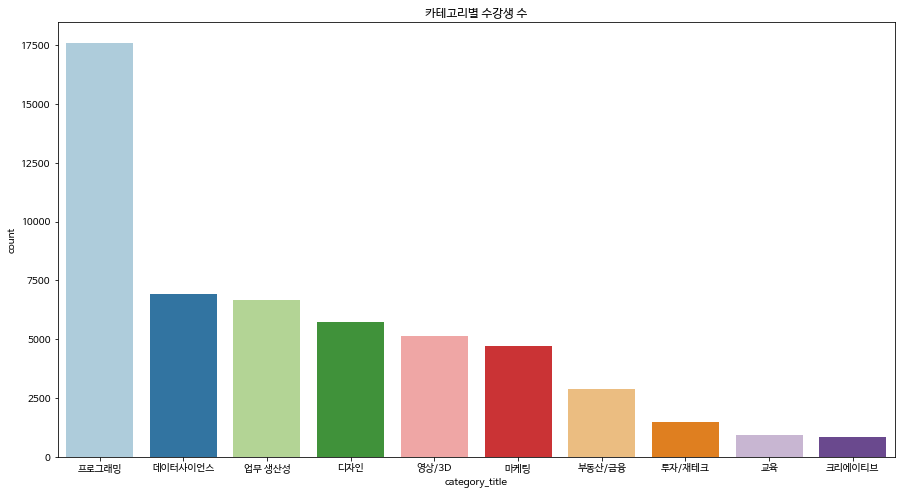

In [37]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=actual_cs, x="category_title", palette='Paired', order =actual_cs['category_title'].value_counts().index) 
plt.title('카테고리별 수강생 수')

In [38]:
actual_cs.category_title.value_counts()

프로그래밍      17608
데이터사이언스     6904
업무 생산성      6668
디자인         5715
영상/3D       5153
마케팅         4712
부동산/금융      2881
투자/재테크      1490
교육           927
크리에이티브       840
Name: category_title, dtype: int64

#### 카테고리별 강의수

In [39]:
for sub in actual_cs['category_title'].unique():
    a = actual_cs[actual_cs['category_title']   == sub]
    courses = a.course_title.value_counts()
    print(f'{sub} : 강의 {len(courses)}개')

교육 : 강의 852개
데이터사이언스 : 강의 163개
디자인 : 강의 28개
마케팅 : 강의 75개
부동산/금융 : 강의 55개
업무 생산성 : 강의 76개
영상/3D : 강의 23개
크리에이티브 : 강의 78개
투자/재테크 : 강의 8개
프로그래밍 : 강의 204개


In [40]:
for sub in actual_cs['category_title'].unique():
    a = actual_cs[actual_cs['category_title']   == sub]
    courses = a.course_title.value_counts()
    print(f'------------카테고리 : {sub}------------')
    print(courses)
    print(f'▶️{sub} 카테고리의 강의 개수는 {len(courses)}개 입니다.')

------------카테고리 : 교육------------
(B2B) 현대백화점 온라인 구독 올 플랜                8
(B2B) 지미디어 온라인 구독 ALL PLAN             5
(B2B) 비바리퍼블리카 온라인 구독 올 플랜 (6월-3개월)     5
(B2B) 골드넥스 온라인 구독 올 플랜 - 패파입주사(2차)     4
(B2B) 파스토 온라인 구독 올 플랜                  4
                                      ..
(B2B) 주식회사 텐큐브 온라인 구독 올 플랜 - 비대면바우처    1
(B2B) 주식회사 유비케어 온라인 구독 올 플랜 2차         1
(B2B) 해피로드 온라인 구독 올 플랜 - 비대면바우처        1
(B2B) 지심컴퍼니 온라인 구독 올 플랜 - 비대면바우처       1
(B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처       1
Name: course_title, Length: 852, dtype: int64
▶️교육 카테고리의 강의 개수는 852개 입니다.
------------카테고리 : 데이터사이언스------------
초격차 패키지 : 한 번에 끝내는 데이터 분석 툴                                        616
올인원 패키지 : 직장인을 위한 파이썬 데이터분석                                        433
초격차 패키지 : 한 번에 끝내는 데이터 분석                                          388
바이블 : 파이썬 기초부터 시작하는 딥러닝 영상인식                                       373
연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 딥러닝 300제+                              356
                                               

In [41]:
aaaa = actual_cs[actual_cs.category_title == '교육']
aaaa[aaaa.format != 'B2B 온라인']

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
16109,1019807,502561.0,204169.0,PAYMENT,COMPLETED,(B2B) 롯데인재개발원 온라인 턴키 제휴 (2021년 4월),교육,B2B,2021-04-20 15:37:55,3300000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
37775,1083400,534776.0,204169.0,PAYMENT,COMPLETED,(B2B) 롯데인재개발원 온라인 턴키 제휴 (2021년 4월),교육,B2B,2021-05-20 9:02:08,200000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
56439,1149068,534776.0,205008.0,PAYMENT,COMPLETED,(B2B) 롯데인재개발원 온라인 턴키 제휴 (2021년 5월),교육,B2B,2021-06-18 12:01:48,150000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
76342,1228524,534776.0,205388.0,PAYMENT,COMPLETED,(B2B) 롯데인재개발원 온라인 턴키 제휴 (2021년 6월),교육,B2B,2021-07-20 9:02:07,9250000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
102991,1349252,534776.0,206465.0,PAYMENT,COMPLETED,(B2B) 롯데인재개발원 온라인 턴키 제휴 (2021년 8월),교육,B2B,2021-09-16 10:17:59,11305000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
102992,1349253,534776.0,206465.0,PAYMENT,COMPLETED,(B2B) 롯데인재개발원 온라인 턴키 제휴 (2021년 8월),교육,B2B,2021-09-16 10:18:00,142500,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN


#### ☞ 의견
[카테고리별 강의수]
- 교육: 852개
- 프로그래밍: 204개
- 데이터사이언스: 163개
- 크리에이티브: 78개
- 업무 생산성: 76개
- 마케팅: 75개
- 부동산/금융: 55개
- 디자인: 28개
- 영상/3D: 23개
- 투자/재테크:  8개


▶️ '교육' 카테고리는 전부 B2B 대상으로 필요시마다 해당 기업에 맞춰 강의가 개설되는 것으로 보여진다.

▶️ 각 카테고리별 수강생 1,000명 이상 모은 강의;
- [프로그래밍] 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발 (1423명)
- [프로그래밍] 초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터 (1416명)
- [영상/3D] 초격차 패키지 : 한번에 끝내는 영상 촬영과 편집 (1217명)
- [마케팅] The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법 (1062명)


In [43]:
# students
len(actual_cs[actual_cs.category_title == '프로그래밍'])

17608

In [44]:
# lectures
actual_cs[actual_cs.category_title == '프로그래밍'].course_title.nunique()

204

#### 카테고리별 평균 수강생 수

In [45]:
# 카테고리 강의 평균 수강생 수 = 해당 카테고리의 전체 수강생 수 ➗ 카테고리 내 개설된 강의수 (소수점 자리는 올림으로 처리)
# 해당 카테고리에 1개 강의가 열렸을 때, 평균적으로 몇 명이 수강(구매)하는지 보는것
import math

for sub in actual_cs['category_title'].unique():
    students = len(actual_cs[actual_cs.category_title == sub])
    lectures = actual_cs[actual_cs.category_title == sub].course_title.nunique()
    print(f'{sub}: {math.ceil(students/lectures)}명')

교육: 2명
데이터사이언스: 43명
디자인: 205명
마케팅: 63명
부동산/금융: 53명
업무 생산성: 88명
영상/3D: 225명
크리에이티브: 11명
투자/재테크: 187명
프로그래밍: 87명


#### ☞ 의견
[카테고리별 평균 수강인원]
- 영상/3D: 225명
- 디자인: 205명
- 투자/재테크: 187명
- 업무 생산성: 88명
- 프로그래밍: 87명
- 마케팅: 63명
- 부동산/금융: 53명
- 데이터사이언스: 43명
- 크리에이티브: 11명
- 교육: 2명

특정 카테고리에 많은 강의가 개설되었다면 자연히 그 카테고리의 수강생 수가 많을 수 밖에 없으므로, 카테고리 전체 수강인원을 개설된 강의수로 나누어 카테고리의 평균 수강인원을 계산해 보았다.

계산 결과, '영상/3D', '디자인' 카테고리의 평균 수강인원이 많은 것을 알 수 있었다. 카테고리별 수강생 분포에서 가장 많은 인원수를 보였던 '프로그래밍'의 경우 개설된 강의가 204개로 많아 수강생 수도 많았던 것으로 보여진다. 실제 1개 강의당 평균 수강인원은 87명이었다.

따라서 개설된 강의 대비 '영상/3D', '디자인', '투자/재테크' 관련 카테고리에서 판매가 더 많이 이루어지는 것으로 보인다.

그런데 여기서 주의해서 보아할 점은, 평균이 꼭 그 카테고리의 인기를 보여주는 것은 아니라고 보여진다. 왜냐하면 위에서 보았듯 1,000명 이상이 수강한 강의를 추렸을 때 아래 4개의 강의가 해당되었고, 이 중 2개가 '프로그래밍', 1개가 '마케팅' 카테고리의 강의였기 때문이다.

▶️ 각 카테고리별 수강생 1,000명 이상 모은 강의;
- [프로그래밍] 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발 (1423명)
- [프로그래밍] 초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터 (1416명)
- [영상/3D] 초격차 패키지 : 한번에 끝내는 영상 촬영과 편집 (1217명)
- [마케팅] The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법 (1062명)

➡️ 마케팅의 김영하 작가 강의는 왜이렇게 인기가 많은가?


# [[ 책갈피 ]]

➡️ 마케팅의 김영하 작가 강의는 왜이렇게 인기가 많은가?

➡️ 마케팅 효과(할인 쿠폰 제공)가 영향이 있었을까?
- 쿠폰 종류(coupon_title) 확인
- 쿠폰 종류에 따른 추가 분석......

In [126]:
### ★★★ 프로그래밍 강의목록에서 B2B 강의는 빼고싶다!!!!!!! 안됌.....★★★
actual_cs[actual_cs.category_title == '프로그래밍']['course_title'].unique()

#p_b2b = actual_cs[actual_cs.category_title == '프로그래밍']['course_title'].str.startswith( '(B2B)' ).index
#pp_b2b = actual_cs.loc[actual_cs.course_title.isnoyin(p_b2b)]
#pp_b2b
##customers1 = df.customer_id.value_counts().loc[df.customer_id.value_counts() == 1].index
##c1 = df.loc[df.customer_id.isin(customers1)]
##c1.head()

array(['The RED : 현실 세상의 TDD by 이규원', '올인원 패키지 : AWS/Docker 클라우드 서버 구축',
       '올인원 패키지 : 리눅스 실전 정복', 'The RED : 카카오페이지 기술전략이사 윤진석',
       'The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 MSA 구축 by 이희창',
       '올인원 패키지 : 박은종의 객체지향 설계를 위한 디자인패턴 with 자바',
       '초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영',
       'OpenCV로 배우는 컴퓨터 비전 프로그래밍 22기', '올인원 패키지 : 컴퓨터 공학 전공 필수',
       '합격 패스 : 데이터베이스와 SQLD', '합격 패스 : 정보처리기사 필기&실기',
       '올인원 패키지 : 알고리즘 기술면접 완전 정복', '올인원 패키지 : 네트워크와 보안 핵심 요약',
       '초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편',
       'The RED : 개발자로 살아남기 : 30년을 주도하는 9가지 필수 기술 by 박종천',
       'The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석, 최범균',
       '초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화', '올인원 패키지 : C++ 실력완성',
       '올인원 패키지 : 유니티 포트폴리오 완성', '올인원 패키지 : C#과 유니티로 배우는 게임개발',
       '올인원 패키지 : 누구나 가능한 VR/AR 콘텐츠 제작',
       '올인원 패키지 : C#으로 하는 인공지능 게임 제작 : 강화학습 에이전트를 사용한 보드게임 제작 실습',
       '초격차 패키지 : 게임 개발자 취업의 모든 것', '올인원 패키지 : Android 앱 개발',
       '올인원 패키지 : iOS 앱 개발',
       '초

> 프로그래밍 카테고리에서 이런 현상을 보이는 이유는 프로모션과 B2B 강의 비율이 높아서 그런것으로 보인다.

In [ ]:
# 수강생 1,000명 이상.... 만 뽑고 싶다.... (작성중...)
actual_cs[actual_cs.category_title == '교육']
aaaa[aaaa.format != 'B2B 온라인']


for sub in actual_cs['category_title'].unique():
    a = actual_cs[actual_cs['category_title']   == sub]
    courses = a.course_title.value_counts()
    

customers1 = actual_cs.customer_id.value_counts().loc[actual_cs.customer_id.value_counts() > 1000].index
c1 = df.loc[df.customer_id.isin(customers1)]
c1.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at


#### Subcategory 별 분포

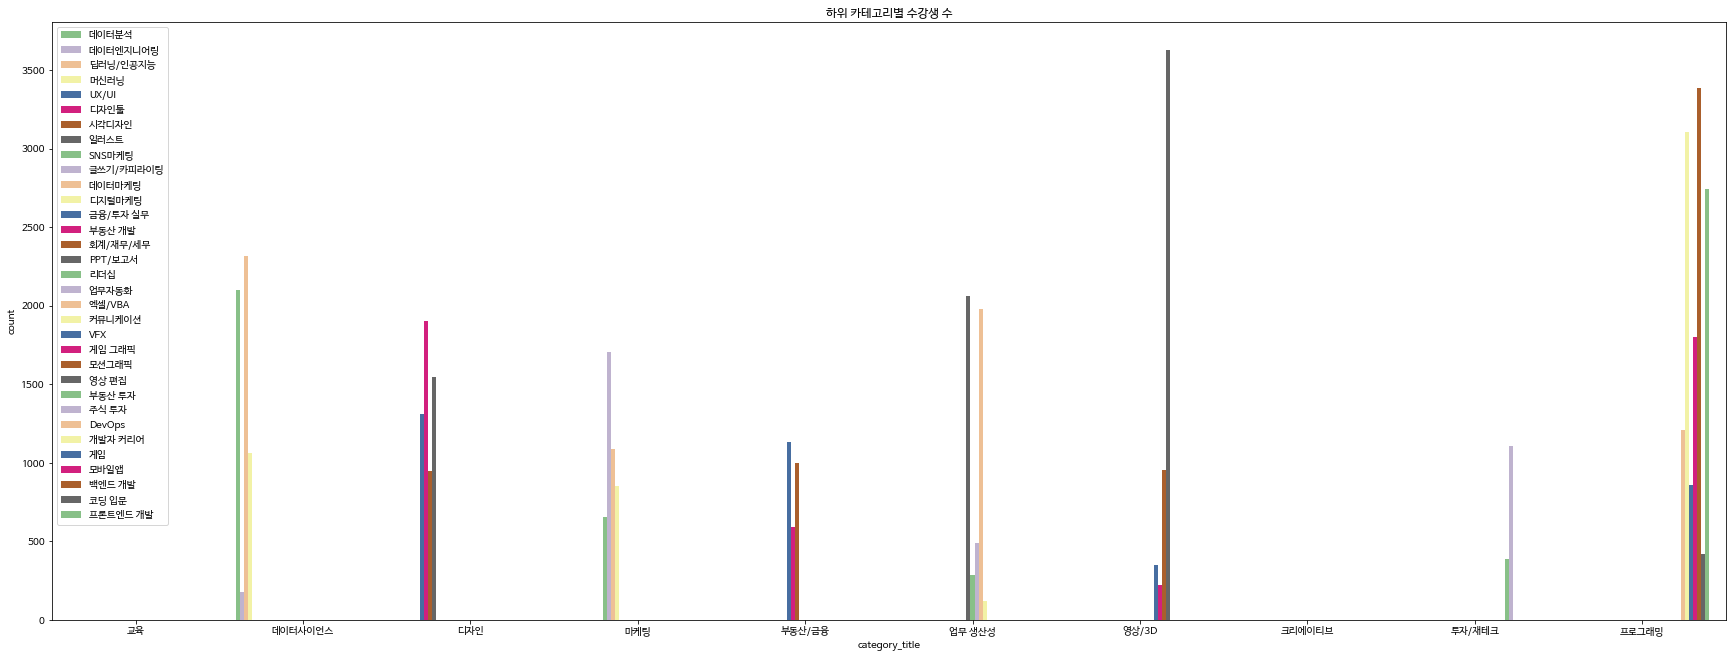

In [47]:
fig_dims = (30, 11)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=actual_cs, x="category_title", palette='Accent', hue="subcategory_title") 
plt.title('하위 카테고리별 수강생 수')
plt.legend(loc='upper left')

> 하위 카테고리로 구분해서 보니 의외로 [프로그래밍]이 아닌 **[영상/3D]의 *'영상 편집'*** 관련 강의 수강생이 3625명으로 모든 subcategory 중 가장 많았다.
>
> 그 다음으로는 [프로그래밍]의 '백엔드 개발(3,386명)', '개발자 커리어(3,104명)' 순이었다.
>
>(교육, 크리에이티브는 subcategory 값이 NaN이라 그래프에서 나타나지 않음. 아래에서 category 기준으로 별도로 그림)

각 카테고리에서 하위 카테고리별 수강생 분포를 확인한다.

In [48]:
actual_cs['category_title'].unique()
for sub in actual_cs['category_title'].unique():
    a = actual_cs[actual_cs['category_title']   == sub]
    b = a.subcategory_title.value_counts()
    print(f'------------카테고리 : {sub}------------')
    print(b)

------------카테고리 : 교육------------
Series([], Name: subcategory_title, dtype: int64)
------------카테고리 : 데이터사이언스------------
딥러닝/인공지능    2314
데이터분석       2098
머신러닝        1060
데이터엔지니어링     178
Name: subcategory_title, dtype: int64
------------카테고리 : 디자인------------
디자인툴     1902
일러스트     1548
UX/UI    1309
시각디자인     950
Name: subcategory_title, dtype: int64
------------카테고리 : 마케팅------------
글쓰기/카피라이팅    1703
데이터마케팅       1090
디지털마케팅        850
SNS마케팅        654
Name: subcategory_title, dtype: int64
------------카테고리 : 부동산/금융------------
금융/투자 실무    1134
회계/재무/세무    1000
부동산 개발       591
Name: subcategory_title, dtype: int64
------------카테고리 : 업무 생산성------------
PPT/보고서    2061
엑셀/VBA     1978
업무자동화       487
리더십         284
커뮤니케이션      117
Name: subcategory_title, dtype: int64
------------카테고리 : 영상/3D------------
영상 편집     3625
모션그래픽      953
VFX        351
게임 그래픽     222
Name: subcategory_title, dtype: int64
------------카테고리 : 크리에이티브------------
Series([], Name: subcategory_title, dtype

##### **프로그래밍**

In [49]:
 # 프로그래밍 
 programing = actual_cs[actual_cs['category_title']   == '프로그래밍']
 programing.subcategory_title.value_counts()

백엔드 개발      3386
개발자 커리어     3104
프론트엔드 개발    2740
모바일앱        1803
DevOps      1211
게임           856
코딩 입문        418
Name: subcategory_title, dtype: int64

(0.0, 3700.0)

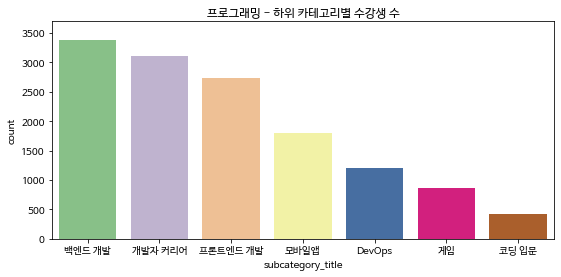

In [50]:
fig_dims = (9, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=programing, x="subcategory_title", palette='Accent', order =programing['subcategory_title'].value_counts().index) 
plt.title('프로그래밍 - 하위 카테고리별 수강생 수')
plt.ylim([0, 3700])

###### ☞ 의견
프로그래밍 중에서도 '백엔드 개발(3,386명)'에 관심이 많은 것으로 나타났다. 

또한 '개발자 커리어(3,104명)'에 대한 관심도 많은 것으로 보여지며, '프론트엔드 개발(2,740명)'도 수강생이 적은 수는 아니지만 상대적으로 프론트엔드 보다는 백엔드에 *대한* 수요가 더 많은 것으로 보여진다.


##### **데이터사이언스**

In [51]:
# 데이터사이언스 
DS = actual_cs[actual_cs['category_title']   == '데이터사이언스']
DS.subcategory_title.value_counts()

딥러닝/인공지능    2314
데이터분석       2098
머신러닝        1060
데이터엔지니어링     178
Name: subcategory_title, dtype: int64

(0.0, 3700.0)

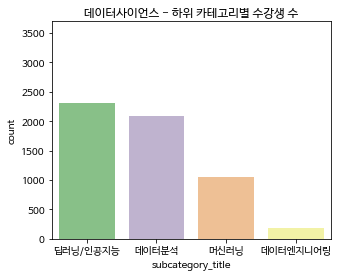

In [52]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=DS, x="subcategory_title", palette='Accent', order =DS['subcategory_title'].value_counts().index) 
plt.title('데이터사이언스 - 하위 카테고리별 수강생 수')
plt.ylim([0, 3700])

###### ☞ 의견
데이터사이언스 관련, '딥러닝/인공지능(2,314명) '과 '데이터분석(2,098명)' 강의를 수강하는 사람이 많았고, 프로그래밍의 '프론트엔드 개발 (2,740명)'과 가깝게 사람들이 관심을 꽤나 가지고 있는 것으로 보여진다.

##### **업무 생산성**

In [53]:
# 업무 생산성 
wp = actual_cs[actual_cs['category_title']   == '업무 생산성']
wp.subcategory_title.value_counts()

PPT/보고서    2061
엑셀/VBA     1978
업무자동화       487
리더십         284
커뮤니케이션      117
Name: subcategory_title, dtype: int64

(0.0, 3700.0)

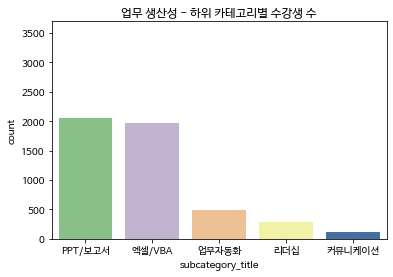

In [54]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=wp, x="subcategory_title", palette='Accent', order =wp['subcategory_title'].value_counts().index) 
plt.title('업무 생산성 - 하위 카테고리별 수강생 수')
plt.ylim([0, 3700])

###### ☞ 의견
업무 생산성 관련 강의도 'PPT/보고서(2,061명)', '엑셀/VBA(1,978명)'가 약 2천명이 수강했으며 사람들이 발표자료나 보고서 작성에 투자하는 것을 알 수 있었다.

##### **디자인**

In [55]:
# 디자인 
design = actual_cs[actual_cs['category_title']   == '디자인']
design.subcategory_title.value_counts()

디자인툴     1902
일러스트     1548
UX/UI    1309
시각디자인     950
Name: subcategory_title, dtype: int64

(0.0, 3700.0)

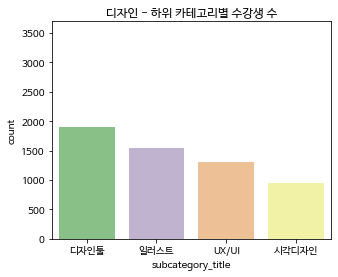

In [56]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=design, x="subcategory_title", palette='Accent', order =design['subcategory_title'].value_counts().index) 
plt.title('디자인 - 하위 카테고리별 수강생 수')
plt.ylim([0, 3700])

##### **영상/3D**

In [57]:
# 영상/3D 
dv = actual_cs[actual_cs['category_title']   == '영상/3D']
dv.subcategory_title.value_counts()

영상 편집     3625
모션그래픽      953
VFX        351
게임 그래픽     222
Name: subcategory_title, dtype: int64

(0.0, 3700.0)

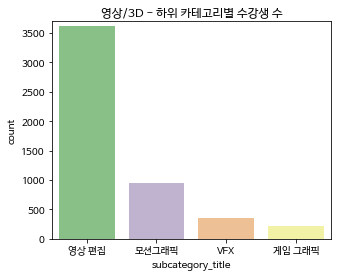

In [58]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=dv, x="subcategory_title", palette='Accent', order =dv['subcategory_title'].value_counts().index) 
plt.title('영상/3D - 하위 카테고리별 수강생 수')
plt.ylim([0, 3700])

###### ☞ 의견
영상/3D 카테고리에서 특히 '영상 편집(3,625명)' 관련 강의의 수요가 많은 것을 알 수 있었다. YouTube 등 여러 소셜 미디어를 통해 개인의 컨텐츠 게재, 특히 영상 컨텐츠가 활발히 업로드되는 시대를 반영하고 있는 것으로 생각해 볼 수 있다.

##### **마케팅**

In [59]:
# 마케팅
mkt = actual_cs[actual_cs['category_title']   == '마케팅']
mkt.subcategory_title.value_counts()

글쓰기/카피라이팅    1703
데이터마케팅       1090
디지털마케팅        850
SNS마케팅        654
Name: subcategory_title, dtype: int64

(0.0, 3700.0)

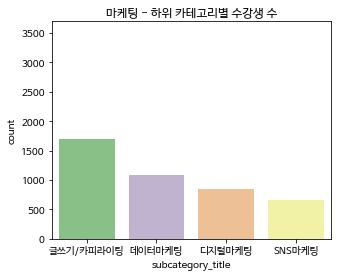

In [60]:
fig_dims = (5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=mkt, x="subcategory_title", palette='Accent', order =mkt['subcategory_title'].value_counts().index) 
plt.title('마케팅 - 하위 카테고리별 수강생 수')
plt.ylim([0, 3700])

###### ☞ 의견
마케팅 카테고리에서는 디지털 마케팅, SNS 마케팅에 대한 수요가 제일 많을 것으로 예상했으나, 실제 데이터를 보니 예상외로 '글쓰기/카피라이팅(1,703명)' 강의가 가장 많이 판매된 것을 알 수 있었다.

글쓰기의 중요성을 더 많은 사람들이 인지하는 것일 수도 있고, 또는 요즘 문해력이 많이 떨어지고 있다고 하는데 글쓰기에 어려움을 느끼는 사람이 많아진 것일 수도 있다고 생각해본다.


##### **부동산/금융**

In [61]:
# 부동산/금융
finance = actual_cs[actual_cs['category_title']   == '부동산/금융']
finance.subcategory_title.value_counts()

금융/투자 실무    1134
회계/재무/세무    1000
부동산 개발       591
Name: subcategory_title, dtype: int64

(0.0, 3700.0)

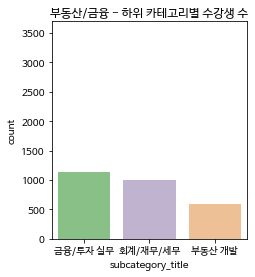

In [62]:
fig_dims = (3.5, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=finance, x="subcategory_title", palette='Accent', order =finance['subcategory_title'].value_counts().index) 
plt.title('부동산/금융 - 하위 카테고리별 수강생 수')
plt.ylim([0, 3700])

##### **투자/재테크**

In [63]:
# 투자/재테크
invest = actual_cs[actual_cs['category_title']   == '투자/재테크']
invest.subcategory_title.value_counts()

주식 투자     1106
부동산 투자     384
Name: subcategory_title, dtype: int64

(0.0, 3700.0)

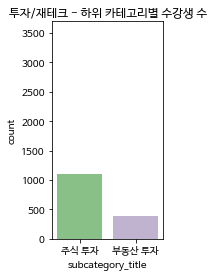

In [64]:
fig_dims = (2, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=invest, x="subcategory_title", palette='Accent', order =invest['subcategory_title'].value_counts().index) 
plt.title('투자/재테크 - 하위 카테고리별 수강생 수')
plt.ylim([0, 3700])

###### ☞ 의견
위의 부동산/금융 카테고리의 '금융/투자 실무(1,134명)'만큼 투자/재테크 카테고리에서 '주식 투자(1,106명)'의 강의가 비슷하게 판매된 것을 알 수 있다.
또한 사람들이 '부동산 투자(384명)' 보다는 주식 투자에 훨씬 많은 관심이 있는것으로 보인다. (진입장벽의 차이일 수도 있을 듯)

##### **교육**

> 하위 카테고리가 모두 NaN이기 때문에 교육 자체 값으로 대체

In [65]:
# 교육
edu = actual_cs[actual_cs['category_title']   == '교육']
edu.category_title.value_counts()

교육    927
Name: category_title, dtype: int64

In [66]:
edu['subcategory_title'].unique()

array([nan], dtype=object)

(0.0, 3700.0)

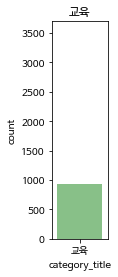

In [67]:
fig_dims = (1, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=edu, x="category_title", palette='Accent') 
plt.title('교육')
plt.ylim([0, 3700])

##### **크리에이티브**

> 하위 카테고리가 모두 NaN이기 때문에 크리에이티브 자체 값으로 대체

In [68]:
# 크리에이티브
creative = actual_cs[actual_cs['category_title']   == '크리에이티브']
creative.head(3)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
118,971012,428657.0,NaN,PAYMENT,COMPLETED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 18:44:19,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN
213,971295,52710.0,NaN,PAYMENT,COMPLETED,프로모션 : 영상 퀄리티를 바꿔 줄 영상 제작 스킬 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 20:47:30,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN
230,971346,401831.0,NaN,PAYMENT,COMPLETED,프로모션 : 영상 퀄리티를 바꿔 줄 영상 제작 스킬 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 21:05:36,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN


In [69]:
creative['subcategory_title'].unique()

array([nan], dtype=object)

In [70]:
creative.category_title.value_counts()

크리에이티브    840
Name: category_title, dtype: int64

(0.0, 3700.0)

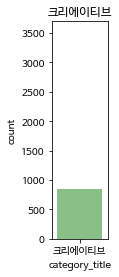

In [71]:
fig_dims = (1, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=creative, x="category_title", palette='Accent') 
plt.title('크리에이티브')
plt.ylim([0, 3700])

#### 하위 카테고리별 평균 수강생 수

In [72]:
# 하위 카테고리 강의 평균 수강생 수 = 해당 Subcategory의 전체 수강생 수 ➗ Subcategory 내 개설된 강의수 (소수점 자리는 올림으로 처리)
# 해당 Subcategory에 1개 강의가 열렸을 때, 평균적으로 몇 명이 수강(구매)하는지 보는것

for subcat in actual_cs['subcategory_title'].unique():
    sub_students = len(actual_cs[actual_cs.subcategory_title == subcat])
    sub_lectures = actual_cs[actual_cs.subcategory_title == subcat].course_title.nunique()
    print()
    if sub_lectures != 0:
        print(f'{subcat}: {math.ceil(sub_students/sub_lectures)}명')
    else:
        print(sub_lectures)


0

데이터분석: 210명

데이터엔지니어링: 45명

딥러닝/인공지능: 155명

머신러닝: 133명

UX/UI: 164명

디자인툴: 272명

시각디자인: 190명

일러스트: 310명

SNS마케팅: 82명

글쓰기/카피라이팅: 341명

데이터마케팅: 218명

디지털마케팅: 213명

금융/투자 실무: 126명

부동산 개발: 99명

회계/재무/세무: 167명

PPT/보고서: 344명

리더십: 57명

업무자동화: 244명

엑셀/VBA: 330명

커뮤니케이션: 59명

VFX: 88명

게임 그래픽: 74명

모션그래픽: 318명

영상 편집: 303명

부동산 투자: 128명

주식 투자: 222명

DevOps: 152명

개발자 커리어: 345명

게임: 143명

모바일앱: 301명

백엔드 개발: 424명

코딩 입문: 105명

프론트엔드 개발: 274명


#### Course_title 분포

##### 영상 편집　| 영상/3D

'영상 편집' subcategory에 어떤 강의들이 있는지와 강의별 수강생 분포를 알아본다.

In [73]:
dv_edit = dv[dv['subcategory_title'] == '영상 편집']
dv_edit

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
142,971072,478044.0,204150.0,PAYMENT,COMPLETED,올인원 패키지 : 십다 프리미어,영상/3D,올인원,2021-03-28 19:17:58,69000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,79000.0,79000.0,NaN,CARD,영상 편집,2021-02-26 0:00:00
150,971105,478233.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 19:39:24,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,VBANK,영상 편집,2020-12-02 0:00:00
157,971143,478246.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 19:51:41,116000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
210,971288,469748.0,204172.0,PAYMENT,COMPLETED,올인원 패키지 : 바다가 알려주는 감성가득 영상 제작,영상/3D,올인원,2021-03-28 20:45:19,89000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,109000.0,109000.0,NaN,VBANK,영상 편집,2021-03-19 0:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105387,1364842,638903.0,206720.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 10:56:03,159000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,169000.0,169000.0,KAKAO,POINT,영상 편집,2021-08-17 0:00:00
105393,1364869,638903.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 11:22:07,139000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,149000.0,149000.0,KAKAO,POINT,영상 편집,2020-12-02 0:00:00
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02 0:00:00
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15 0:00:00


In [74]:
i = dv_edit['course_title'].nunique()
ii = dv_edit ['course_title'].unique()
iii = dv_edit ['course_title'].value_counts()

print(i)
print()
print(iii)

12

초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                               1217
올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리미어프로 베이직     518
용호수의 돈 버는 실전 영상 제작                                         409
올인원 패키지 : 십다 프리미어                                          275
올인원 패키지 : 바다가 알려주는 감성가득 영상 제작                              256
올인원 패키지 : 영상 제작/편집(2020)                                   193
초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기                            186
올인원 패키지 : 누적 조회수 12억! 우감독의 재미있는 영상 편집                      184
The RED : 탑 아티스트가 선택한 디렉터 : 권오준이 알려주는 영상 연출의 모든 것          150
편집하는여자의 영상편집 마스터클래스 - 제 2강 10가지 편집기법으로 프리미어 레벨업하기!         124
올인원 패키지 : 다빈치리졸브로 배우는 영상 색 보정 A to Z                       110
[묶음] 용호수의 입문+실전 강의를 한 번에!                                    3
Name: course_title, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

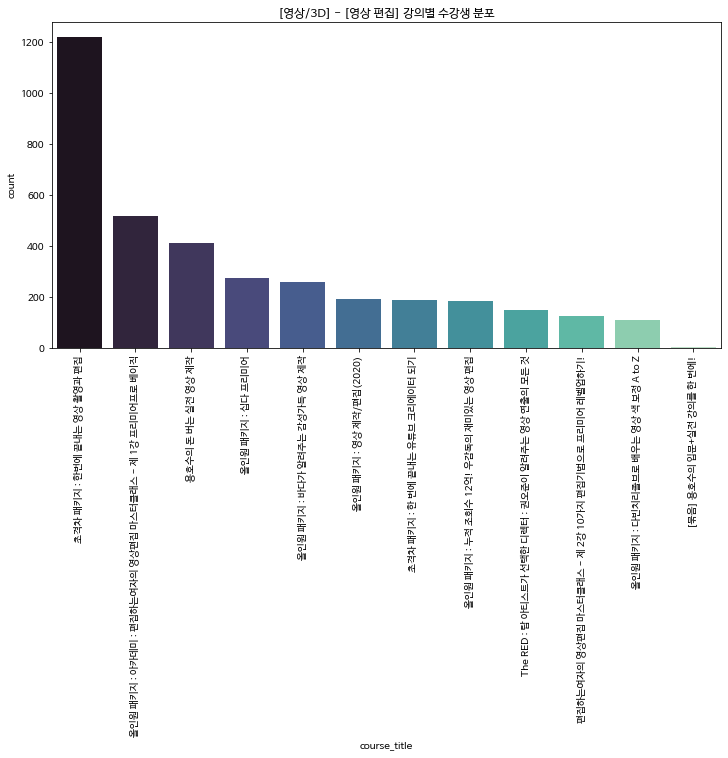

In [75]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=dv_edit, x="course_title", palette='mako', order =dv_edit['course_title'].value_counts().index) 
plt.title('[영상/3D] - [영상 편집] 강의별 수강생 분포')
plt.xticks(rotation =  90)

###### ☞ 의견
영상 편집 카테고리에서 판매가 가장 많이된 강의를 보니, 영상 편집 뿐만 아니라 촬영에도 관심이 많은 것으로 보인다. 

##### 백엔드 개발　| 프로그래밍

In [76]:
# 프로그래밍
programing['subcategory_title'].unique()

back = programing[programing['subcategory_title']   == '백엔드 개발']
back
back1 = back['course_title'].nunique()
back2 = back['course_title'].unique()
back3 = back['course_title'].value_counts()

print(back1)
print(back3)

8
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                     1416
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                          827
초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발                                 491
(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판            139
초격차 패키지 : 한 번에 끝내는 Spring 완.전.판                             138
The RED : 백엔드 에센셜 : 대용량 서비스를 위한 아키텍처 with Redis by 강대명      131
올인원 패키지 : 스프링러너의 스프링 아카데미 : Spring을 활용한 유연한 백엔드 개발 트레이닝     122
올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다                             122
Name: course_title, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

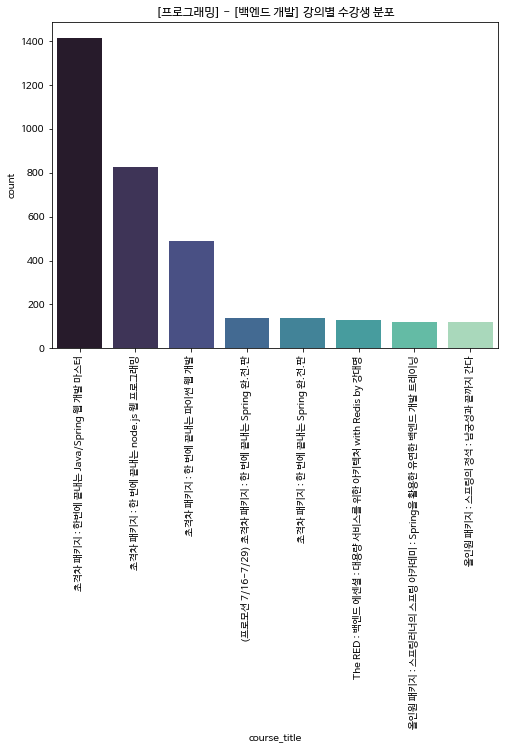

In [77]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=back, x="course_title", palette='mako', order =back['course_title'].value_counts().index) 
plt.title('[프로그래밍] - [백엔드 개발] 강의별 수강생 분포')
plt.xticks(rotation =  90 )

###### ☞ 의견
Java와 Spring 웹 개발에 대한 강의가 가장 많이 판매된 것을 볼 수 있다.

##### 개발자 커리어　| 프로그래밍

In [78]:
# 프로그래밍
devcareer = programing[programing['subcategory_title']   == '개발자 커리어']
devcareer
devcareer1 = devcareer['course_title'].nunique()
devcareer2 = devcareer['course_title'].unique()
devcareer3 = devcareer['course_title'].value_counts()

print(devcareer1)
print(devcareer3)

9
올인원 패키지 : 알고리즘 기술면접 완전 정복                              534
초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편                     514
올인원 패키지 : 컴퓨터 공학 전공 필수                                 506
합격 패스 : 정보처리기사 필기&실기                                   503
합격 패스 : 데이터베이스와 SQLD                                   367
초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화               299
The RED : 개발자로 살아남기 : 30년을 주도하는 9가지 필수 기술 by 박종천       141
올인원 패키지 : 네트워크와 보안 핵심 요약                               120
The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석, 최범균    120
Name: course_title, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

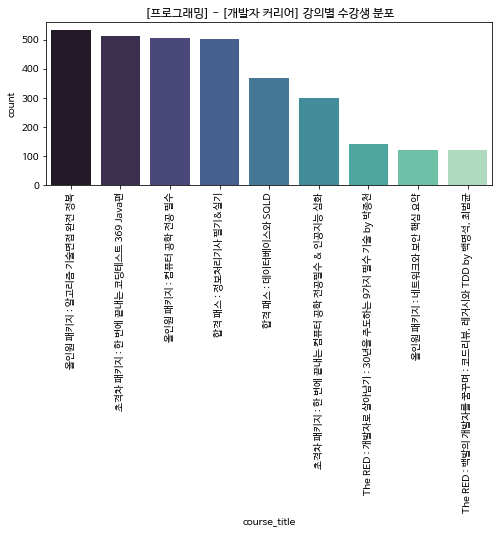

In [79]:
fig_dims = (8, 3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=devcareer, x="course_title", palette='mako', order =devcareer['course_title'].value_counts().index) 
plt.title('[프로그래밍] - [개발자 커리어] 강의별 수강생 분포')
plt.xticks(rotation =  90 )

##### 프론트엔드 개발　| 프로그래밍


In [80]:
# 프로그래밍
front = programing[programing['subcategory_title']   == '프론트엔드 개발']
front
front1 = front['course_title'].nunique()
front2 = front['course_title'].unique()
front3 = front['course_title'].value_counts()

print(front1)
print(front3)

10
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                           1423
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential     656
초격차 패키지 : 한 번에 끝내는 React의 모든 것                                         224
올인원 패키지 : Vue.js 압축 완성                                                 111
The RED : 견고한 UI 설계를 위한 마크업 가이드 by 정찬명                                  88
The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술                             83
The RED : 김민태                                                           65
The RED : 프론트엔드 개발자 김태곤                                                 47
올인원 패키지 : TypeScript & Angular 실전                                       42
(B2B) K-Digital Training 핀테크 서비스 프론트엔드 개발 과정 1기                          1
Name: course_title, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

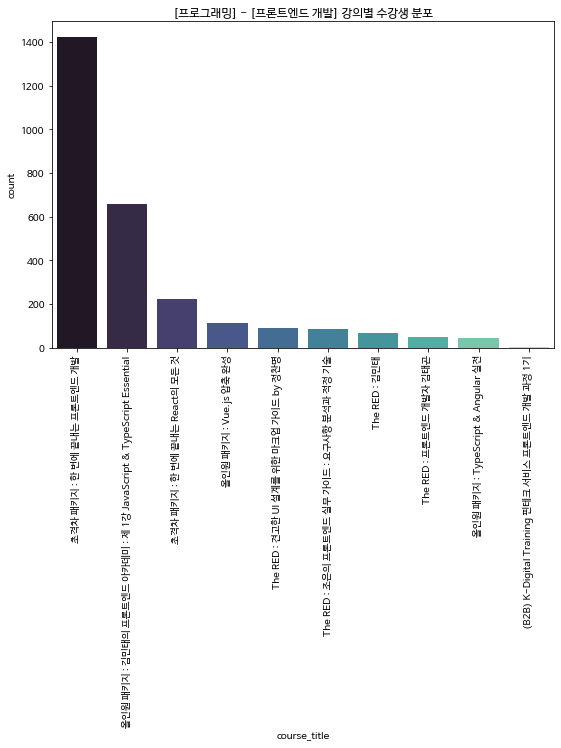

In [81]:
fig_dims = (9, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=front, x="course_title", palette='mako', order =front['course_title'].value_counts().index) 
plt.title('[프로그래밍] - [프론트엔드 개발] 강의별 수강생 분포')
plt.xticks(rotation =  90 )

##### 딥러닝/인공지능　| 데이터사이언스

In [82]:
DeepAI = DS[DS['subcategory_title']   == '딥러닝/인공지능']
DeepAI
DeepAI1 = DeepAI['course_title'].nunique()
DeepAI2 = DeepAI['course_title'].unique()
DeepAI3 = DeepAI['course_title'].value_counts()

print(DeepAI1)
print(DeepAI3)

15
바이블 : 파이썬 기초부터 시작하는 딥러닝 영상인식                  373
연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 딥러닝 300제+         356
올인원 패키지 : 딥러닝/인공지능                            274
초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능                   212
올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리         184
올인원 패키지 : 컴퓨터비전과 딥러닝                          168
올인원 패키지 : 딥러닝을 활용한 추천시스템 구현                   166
올인원 패키지 : 처음부터 시작하는 딥러닝 유치원                   141
The RED : 칼만필터를 활용한 자율주행 센서퓨전 기술 구현 by 조형기    139
올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문               78
올인원 패키지 : 수학적으로 접근하는 딥러닝                       75
글로벌 엑스퍼트 : GAN 딥러닝 완벽 가이드 with 글로벌 엔지니어        59
올인원 패키지 : 김기현의 딥러닝을 활용한 자연어생성                  55
REC.ON : Autonomous Vehicle                    20
REC.ON : AI                                    14
Name: course_title, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

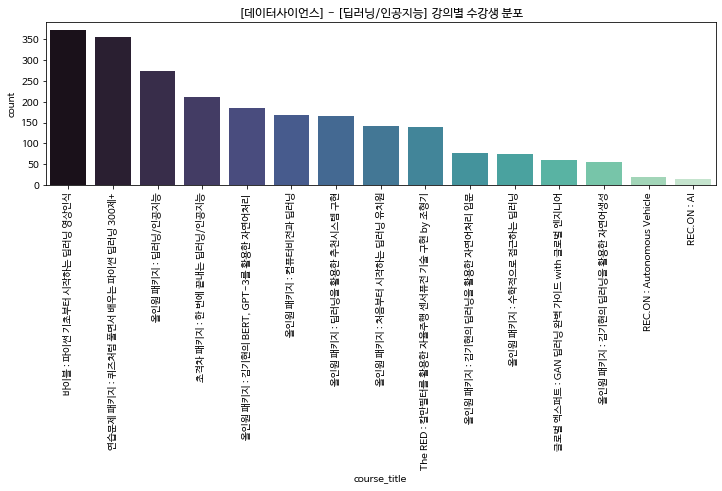

In [83]:
fig_dims = (12, 3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=DeepAI, x="course_title", palette='mako', order =DeepAI['course_title'].value_counts().index) 
plt.title('[데이터사이언스] - [딥러닝/인공지능] 강의별 수강생 분포')
plt.xticks(rotation =  90 )

##### 데이터분석　| 데이터사이언스

In [84]:
dataAnalysis = DS[DS['subcategory_title']   == '데이터분석']
dataAnalysis
dataAnalysis1 = dataAnalysis['course_title'].nunique()
dataAnalysis2 = dataAnalysis['course_title'].unique()
dataAnalysis3 = dataAnalysis['course_title'].value_counts()

print(dataAnalysis1)
print(dataAnalysis3)

10
초격차 패키지 : 한 번에 끝내는 데이터 분석 툴               616
올인원 패키지 : 직장인을 위한 파이썬 데이터분석               433
초격차 패키지 : 한 번에 끝내는 데이터 분석                 388
올인원 패키지 : 파이썬을 활용한 시계열 데이터 분석 A-Z         189
올인원 패키지 : 프로젝트와 함께 배우는 R 데이터 분석           140
올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP       111
올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석            111
The RED : 데이터 사이언티스트 하용호                   64
글로벌 엑스퍼트 : 바이오 데이터사이언스(Bioinformatics)     31
Apache Spark을 이용한 빅데이터 분석 입문 15기           15
Name: course_title, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

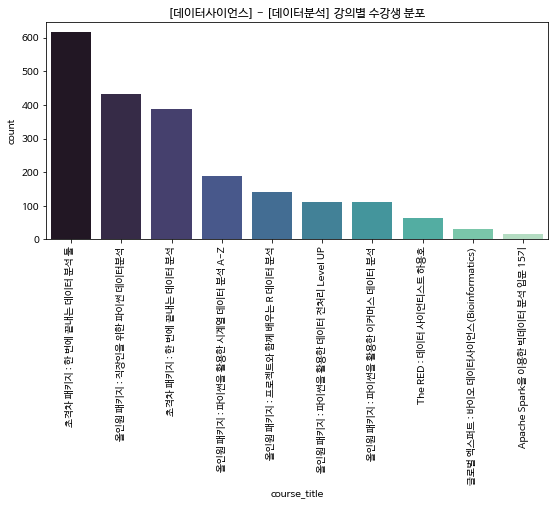

In [85]:
fig_dims = (9, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=dataAnalysis, x="course_title", palette='mako', order =dataAnalysis['course_title'].value_counts().index) 
plt.title('[데이터사이언스] - [데이터분석] 강의별 수강생 분포')
plt.xticks(rotation =  90 )

##### PPT/보고서　| 업무 생산성

In [86]:
ppt = wp[wp['subcategory_title']   == 'PPT/보고서']
ppt
ppt1 = ppt['course_title'].nunique()
ppt2 = ppt['course_title'].unique()
ppt3 = ppt['course_title'].value_counts()

print(ppt1)
print(ppt3)

6
초격차 패키지 : 일잘러 필수 스킬 모음.zip                            621
초격차 패키지 : 한번에 끝내는 PPT 제작/디자인                          574
올인원 패키지 : 100억을 움직이는 단 10장의 PPT                       388
올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX                         227
올인원 패키지 : 13만 구독자 피피티프로젝트의 누구나 쉽게 배우는 시선강탈 피피티 디자인    145
올인원 패키지 : 자유자재로 쓰는 태블로 대시보드 마스터                       106
Name: course_title, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

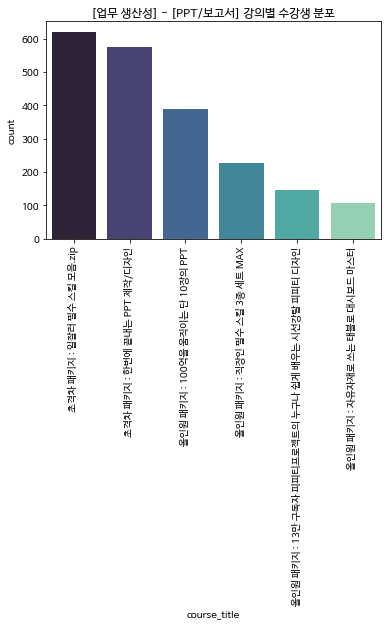

In [87]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=ppt, x="course_title", palette='mako', order =ppt['course_title'].value_counts().index) 
plt.title('[업무 생산성] - [PPT/보고서] 강의별 수강생 분포')
plt.xticks(rotation =  90 )

##### 엑셀/VBA　| 업무 생산성

In [88]:
vba = wp[wp['subcategory_title']   == '엑셀/VBA']
vba
vba1 = vba['course_title'].nunique()
vba2 = vba['course_title'].unique()
vba3 = vba['course_title'].value_counts()

print(vba1)
print(vba3)

6
나의 칼퇴치트키 엑셀유치원                   793
초격차 패키지 : 한 번에 끝내는 엑셀 실무         658
올인원 패키지 : 엑셀언니의 사무실용 엑셀뿌수기       171
올인원 패키지 : 엑셀 실무 마스터              145
올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무    136
올인원 패키지 : 통계와 엑셀을 활용한 데이터 분석      75
Name: course_title, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

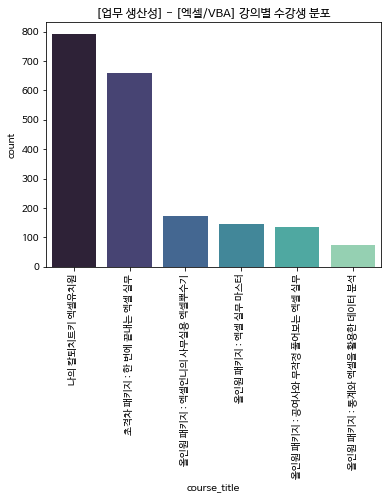

In [89]:
fig_dims = (6, 4.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=vba, x="course_title", palette='mako', order =vba['course_title'].value_counts().index) 
plt.title('[업무 생산성] - [엑셀/VBA] 강의별 수강생 분포')
plt.xticks(rotation =  90 )

##### 글쓰기/카피라이팅　| 마케팅

In [90]:
writing = mkt[mkt['subcategory_title']   == '글쓰기/카피라이팅']
writing
writing1 = writing['course_title'].nunique()
writing2 = writing['course_title'].unique()
writing3 = writing['course_title'].value_counts()

print(writing1)
print(writing3)

5
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법    1062
올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱         224
THE RED : 광고인 박웅현과 크리에이티브                  214
The RED : 지브리 스튜디오 제작국장에게 듣는 스토리텔링 기획법     185
올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱 플러스      18
Name: course_title, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

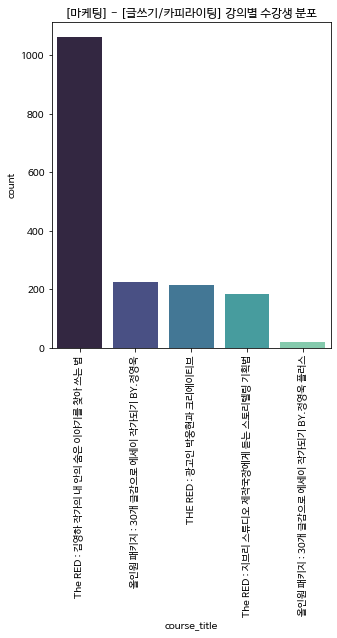

In [91]:
fig_dims = (5, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=writing, x="course_title", palette='mako', order =writing['course_title'].value_counts().index) 
plt.title('[마케팅] - [글쓰기/카피라이팅] 강의별 수강생 분포')
plt.xticks(rotation =  90 )

##### ☞ 의견
위에서 Subcategory 별 분포를 봤을 때 사람들이 글쓰기에 대한 관심이 많다고 생각했는데, 이 그래프에서 보면 김영하 작가의 The RED 특강 판매가 특히 많이 되어서 글쓰기/카피라이팅 카테고리 판매량에 영향을 준 것으로 알 수 있었다.

In [ ]:
# actual_cs[actual_cs.category_title == '마케팅']['course_title'].unique()

#### 쿠폰 효과 확인
➡️ 마케팅 효과(할인 쿠폰 제공)가 영향이 있었을까?
- 쿠폰 종류(coupon_title) 확인
- 쿠폰 종류에 따른 추가 분석......

In [130]:
print(data['coupon_title'].unique())
print(len(data['coupon_title'].unique()))

[nan '[10% 할인] 시크릿코드 실무 완성편' '[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰'
 '[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰' '[웰컴쿠폰] 온라인 완주반 5만원 할인 쿠폰'
 '?즉시할인 쿠폰 코드 : spring5% ?' '[럭키룰렛] 올인원패키지' '[웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰'
 '타이포그래피 기수강생 할인 쿠폰' '[할인쿠폰] 파이낸스 카테고리 올인원 패키지 30% 할인 (금융 아카데미 제외)'
 '[럭키룰렛] 완주반' '[10% 할인] 프론트엔드 실무 완성편'
 '한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)'
 '수강생 50만명 돌파 기념 감사제 쿠폰' '올인원 패키지 : 타이포그래피와 편집디자인 강의 수강권'
 '[무료수강권] 강의 검수용_이호상 PM님' '패캐머_온라인 쿠폰 !'
 '[무료수강권] 파이낸스 카테고리 올인원 패키지_대체투자 자산운용 실무 영상 오픈 일정 변경'
 '한 번에 끝내는 반복 업무 자동화 초격차 패키지 사용 가능 쿠폰' 'crm 검수용 쿠폰 aop'
 '[쿠폰재발급]수강생 50만명 돌파 기념 감사제 쿠폰' '[재발급] 페이백 쿠폰'
 '[무료수강권] 강의검수용_강사님 쿠폰_박혜린 강사님' '신해동 발행 쿠폰' '[무료수강권] 강사님 제공용 RED'
 '[무료수강권] 강사님 제공용' '[할인쿠폰] 영상/디자인 카테고리 올인원 패키지 5만원 할인_영상 오픈 일정 변경'
 '[무료수강권] 내부직원 검수용 RED'
 '[무료수강권] 올인원 패키지 : 인스타를 성장시킨 50명의 성공 방정식 강의검수용_강사님 쿠폰' '올인원패키지'
 '[무료수강권] 내부직원 강의 검수용' '[무료수강권] 권오상 회계사의 자금조달 분석 및 가치평가_23기 신동현 수강생님'
 '[재발급] [웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰' '[무료수강권] 완주반 후기 리워드'
 '[할인쿠폰] 초격차 패키지 디자인 툴 5만원 기수강생 할인 쿠폰' 'SQLD 합격패스_5만원 보

In [129]:
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15 0:00:00
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10 0:00:00
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15 0:00:00
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10 0:00:00


### 한사람당 수강하는 평균 강의수 - actual_cs (실 수강생) 기준


In [92]:
actual_cs.customer_id.value_counts()

98685.0     53
427973.0    47
158374.0    42
50769.0     39
3189.0      39
            ..
503153.0     1
152206.0     1
486940.0     1
500889.0     1
670842.0     1
Name: customer_id, Length: 39516, dtype: int64

In [93]:
actual_cs.customer_id.value_counts().mean()

1.3386476364004454

>일인당 1.3개 강의 수강 (약 1개 강의 평균으로 보임) 
<br> 최대 53개 강의를 수강하는 사람도 있음

#### 1인당 수강 강의수 분포

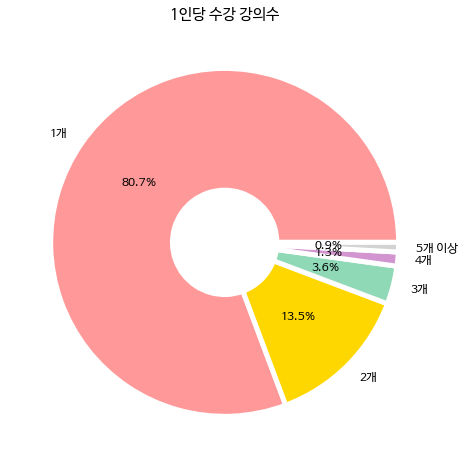

In [94]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)

plt.title('1인당 수강 강의수', size=15)
ratio = [80.19283328272093, 13.462901103350541, 3.5276849883591455, 1.2931470796639337, 0.8831865573438606]
labels = ['1개', '2개', '3개', '4개', '5개 이상']
colors = ['#ff9999', 'gold', '#8fd9b6', '#d395d0', 'lightgray']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops, textprops={'size': 12})
plt.show()

##### 강의를 1개만 수강하는 수강생 비율

In [95]:
actual_cs.customer_id.value_counts().loc[actual_cs.customer_id.value_counts() == 1]

175308.0    1
41039.0     1
645359.0    1
639881.0    1
603209.0    1
           ..
503153.0    1
152206.0    1
486940.0    1
500889.0    1
670842.0    1
Name: customer_id, Length: 31689, dtype: int64

In [96]:
print(31689/39516*100)

80.19283328272093


> 1개 강의만 수강하는 수강생은 80.2%


##### 강의를 2개 이상 수강하는 수강생 비율

In [97]:
actual_cs.customer_id.value_counts().loc[actual_cs.customer_id.value_counts() > 1]

98685.0     53
427973.0    47
158374.0    42
50769.0     39
3189.0      39
            ..
57723.0      2
632333.0     2
507433.0     2
433494.0     2
578497.0     2
Name: customer_id, Length: 7827, dtype: int64

In [98]:
print(7827/39516*100)

19.807166717279078


> 2개 강의 이상 수강하는 수강생은 결제한 수강생 중 약 19.8%


In [99]:
actual_cs.customer_id.value_counts().loc[actual_cs.customer_id.value_counts() > 5 ]
print(349/39516*100)

0.8831865573438606


1개 수강: 31689명 (80.19283328272093 %)

2개 수강: 5320명 (13.462901103350541 %)

3개 수강: 1394명 (3.5276849883591455 %)

4개 수강: 511명 (1.2931470796639337 %)

5개 이상 수강: 349명 (0.8831865573438606 %)

#### 수강 강의수에 다른 카테고리 분포 (1 개 vs. 2개 이상)

In [100]:
customers1 = df.customer_id.value_counts().loc[df.customer_id.value_counts() == 1].index
c1 = df.loc[df.customer_id.isin(customers1)]
c1.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
6,970614,477910.0,NaN,ORDER,CANCELLED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 15:22:36,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN
7,970664,460730.0,200622.0,ORDER,CANCELLED,올인원 패키지 : 기업가치 평가와 M&A 전략 실무,부동산/금융,올인원,2021-03-28 15:25:42,112500,NaN,NaN,122500.0,122500.0,NaN,CARD,금융/투자 실무,2019-05-02 0:00:00
17,970675,478036.0,204037.0,ORDER,CANCELLED,매주)서비스 기획서 완성 온라인 완주반 2101,크리에이티브,온라인 완주반,2021-03-28 15:32:47,367000,NaN,NaN,417000.0,417000.0,NaN,CARD,NaN,2021-01-14 0:00:00


Text(0.5, 1.0, '강의를 1개만 수강하는 수강생의 카테고리 분포')

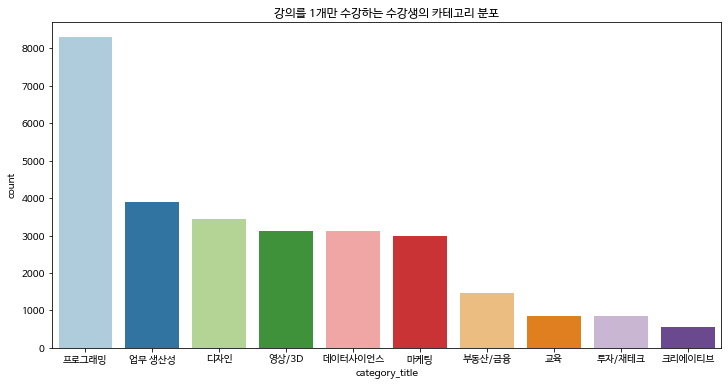

In [101]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=c1, x="category_title", palette='Paired', order = c1['category_title'].value_counts().index)
plt.title('강의를 1개만 수강하는 수강생의 카테고리 분포')

In [102]:
customers = df.customer_id.value_counts().loc[df.customer_id.value_counts() > 1].index
c = df.loc[df.customer_id.isin(customers)]
c.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00
5,970655,478028.0,201797.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,NaN,NaN,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00


Text(0.5, 1.0, '강의를 2개 이상 수강하는 수강생의 카테고리 분포')

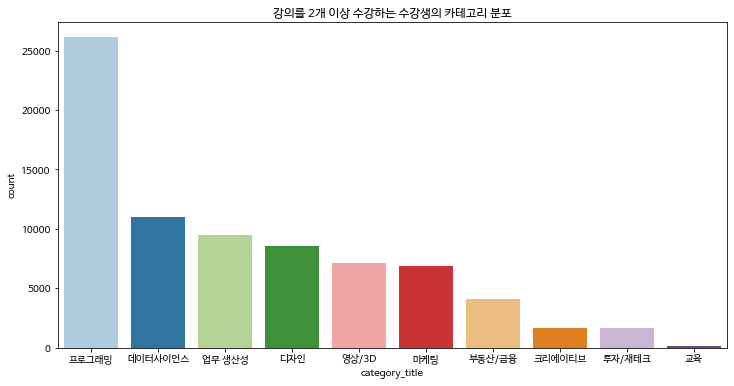

In [103]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=c, x="category_title", palette='Paired', order = c['category_title'].value_counts().index)
plt.title('강의를 2개 이상 수강하는 수강생의 카테고리 분포')

In [104]:
# 두개 그래프를 한 그래프에 표현하도록,,, hue 값이 강의수(단수/다수)?

In [105]:
#actual_cs.customer_id.value_counts().loc[actual_cs.customer_id.value_counts() == 2 ]
#actual_cs.customer_id.value_counts().loc[actual_cs.customer_id.value_counts() == 3 ]
#actual_cs.customer_id.value_counts().loc[actual_cs.customer_id.value_counts() == 4 ]
#actual_cs.customer_id.value_counts().loc[actual_cs.customer_id.value_counts() > 5 ]

### (x 수강 신청 후 실제 구매한 비율)

결제 완료 인원 / (결제 요청 + 결제 완료 + 주문 취소 + 결제 취소) 인원 * 100

(결제 요청 상태인 사람인 미결제인 것으로 포함시킴)

In [106]:
a = len(df[(df['type'] == 'PAYMENT') & (df['state'] == 'REQUESTED')]) # 결제 요청 인원
b = len(df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]) # 결제 완료 인원
c = len(df[(df['type'] == 'ORDER') & (df['state'] == 'CANCELLED')])  # 주문 취소 인원
d = len(df[(df['type'] == 'PAYMENT') & (df['state'] == 'CANCELLED')])  # 결제 취소 인원
print(a)
print(b)
print(c)
print(d)
print()
actual_payment = (b / (a+b+c+d) )*100
print(f' 수강 신청 후 실제 구매율:  {round(actual_payment, 2)} %')

14
52898
34121
7153

 수강 신청 후 실제 구매율:  56.16 %


In [107]:
categorized = df[['category_title', 'subcategory_title', 'course_id', 'customer_id', 'type', 'state']]
categorized

,category_title,subcategory_title,course_id,customer_id,type,state
0,프로그래밍,개발자 커리어,201435.0,504760.0,ORDER,CANCELLED
1,영상/3D,영상 편집,203178.0,432862.0,ORDER,CANCELLED
2,프로그래밍,NaN,204246.0,72297.0,PAYMENT,COMPLETED
3,프로그래밍,NaN,204246.0,72297.0,ORDER,CANCELLED
4,업무 생산성,PPT/보고서,201797.0,478028.0,PAYMENT,COMPLETED
...,...,...,...,...,...,...
105414,영상/3D,영상 편집,205365.0,640697.0,PAYMENT,CANCELLED
105415,부동산/금융,부동산 개발,204159.0,670896.0,PAYMENT,CANCELLED
105416,영상/3D,영상 편집,205365.0,640697.0,PAYMENT,COMPLETED
105417,부동산/금융,부동산 개발,204159.0,670896.0,PAYMENT,CANCELLED


In [108]:
categorized.set_index( ['category_title', 'subcategory_title'] )

course_id  customer_id     type      state
category_title subcategory_title                                            
프로그래밍          개발자 커리어             201435.0     504760.0    ORDER  CANCELLED
영상/3D          영상 편집               203178.0     432862.0    ORDER  CANCELLED
프로그래밍          NaN                 204246.0      72297.0  PAYMENT  COMPLETED
               NaN                 204246.0      72297.0    ORDER  CANCELLED
업무 생산성         PPT/보고서             201797.0     478028.0  PAYMENT  COMPLETED
...                                     ...          ...      ...        ...
영상/3D          영상 편집               205365.0     640697.0  PAYMENT  CANCELLED
부동산/금융         부동산 개발              204159.0     670896.0  PAYMENT  CANCELLED
영상/3D          영상 편집               205365.0     640697.0  PAYMENT  COMPLETED
부동산/금융         부동산 개발              204159.0     670896.0  PAYMENT  CANCELLED
영상/3D          영상 편집               206720.0     610626.0  PAYMENT  COMPLETED

[105393 rows x 4 columns]

### 환불 비율
1. 전체 환불 비율
2. 제일 환불 많이 하는 강의?

환불 인원 / 결제 완료 인원 * 100

In [109]:
e = len(df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]) # 환불 완료 인원
f = len(df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]) # 결제 완료 인원
print(e)
print(f)
print()
actual_payment = (e / f)*100
print(f' 전체 환불 비율:  {round(actual_payment, 2)} %')

3821
52898

 전체 환불 비율:  7.22 %
